# NLP and Data Extraction Challenge
## Data Science and Machine Learning

Internship Brazil Labs - 2024

> The idea of this test is to understand your way of thinking, coding, and problem-solving skills. There is no right answer, just follow your instincts and share with us the solutions of the challenges below.

# 1) Exploratory Data Analysis (EDA) and Visualization

>EDA is a set of process of examining, cleaning, and transforming data to uncover patterns, spot anomalies, test hypotheses, or check assumptions.


>Data visualization is the act of taking information (data) and placing it into a visual context, such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

The **first challenge** is: explore information from **dataset.csv** file.
<br>
You can choose your preferred techniques or tools, be aware that sometimes less is more, present meaningful insights, and show us what you have found interesting on this dataset!

### Solution

In [35]:
# open csv file

import csv
import pandas as pd
import regex as re

dados = pd.read_csv('resume_dataset.csv', delimiter=',', encoding='utf-8')

dados.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [36]:

#TODO: extract skills from text

def extractSkills(text):
    skills = {}
    text = text.lower()
    
    # regex para coletar experiencias e tempo
    reg = r'(?<=\n|^)(?!skill details\s*\n)([^\n-]+)-\s*exprience\s*-\s*(less than \d+ year|\d+)\s*months?'
    matches = re.findall(reg, text)

    for habilidade, experiencia in matches:

        # trata experiencias com menos de 1 ano
        if experiencia.startswith('less than'):
            experiencia = 0

        else:
            experiencia = int(experiencia)

        skills[habilidade] = int(experiencia)

    return skills


data_hab = []

for index, row in dados.iterrows():
    text = row['Resume']

    if 'skill details' in text.lower():
        habilidades = extractSkills(text)

        data_hab.append({'skills': habilidades})



df = pd.DataFrame([(skill, exp) for d in data_hab for skill, exp in d['skills'].items()], columns=['Skill', 'Level'])

df.tail()


,Skill,Level
3731,testing,24
3732,windows xp,24
3733,css,6
3734,database,6
3735,database testing,6


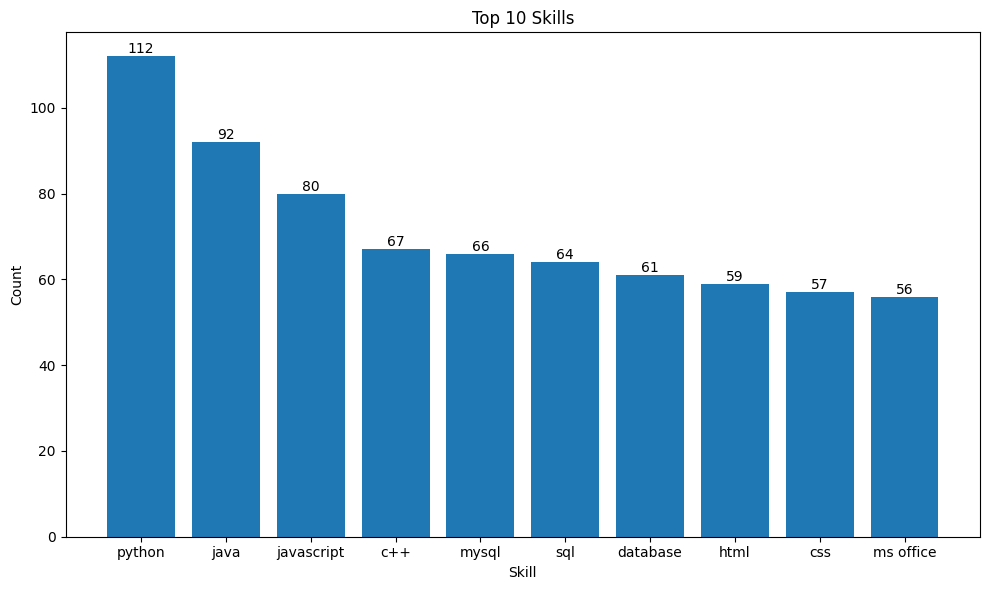

In [39]:
import matplotlib.pyplot as plt

# see most know skills
skill_counts = df['Skill'].value_counts()

sorted_skills = skill_counts.sort_values(ascending=False)

#sorted_skills.head(10)

top_skills = sorted_skills.head(10)

top_skill_names = top_skills.index.tolist()
top_skill_counts = top_skills.values

plt.figure(figsize=(10, 6))
bars = plt.bar(top_skill_names, top_skill_counts)


# Adicione os rótulos de texto (números) em cima de cada barra
for bar, count in zip(bars, top_skill_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom')

plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Top 10 Skills')

plt.tight_layout()
plt.show()

### Explain the rationale of your decision about techniques and visualizations

# 2) NLP techniques / Machine Learning approach

The **second challenge** is: explore dataset information and apply NLP techniques or Machine Learning models to extract even more usefull information from data. Feel free to explore different machine learning models (e.g classification, clustering, etc) and make sure to explain the model results for each task you apply these ML models.
<br><br>
You can choose your preferred techniques or tools, be aware that sometimes less is more, present meaningful insights, and show us what you have found interesting on those files! (i.e: topic modeling, word distributions, etc)

### Machine Learning approach

### Explain the rationale of your NLP techniques/ML models usage and conclusions

# 3) Presentation

The **third** and last exercise is: present your findings to us, challenges of this exercise and how you handled them, and any other important information you will like to share with us.
<br><br>
We will be evaluating your Python code, how you organize your toughts and explanations during the presentation, and other aspects we see as important for a good presentation. You don't need to generate any output for this third task. 

Good luck! :)